## _Medical Insurance Costs_

Pada kasus ini, terdapat data tentang informasi kesehatan dan biaya yang harus dikeluarkan oleh asuransi kesehatan. Infomasi terkait dengan data _medical insurance cost_ adalah sebagai berikut,

1. Age: Usia penerima manfaat
2. Sex: Gender penerima manfaat (_male_, _femele_)
3. Bmi : Body Mass Index
4. Children: Jumlah anak/tanggungan yang dicover oleh pihak asuransi
5. Smoker: Status perokok (_yes_, _no_)
6. Region: Wilayah tempat tinggal penerima manfaat
7. Charges: Biaya yang dikeluarkan oleh asuransi

In [1]:
# Selayang pandang data Medical Insurance Costs
import pandas as pd

df = pd.read_csv('data/insurance.csv')

display(df.head())

display(df.corr())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Tantangan

Buatlah model regresi untuk memprediksi biaya yang harus dikeluarkan oleh pihak asuransi berdasarkan data. Validasi performa model regresi Anda dengan nilai ***R-squared ($R^2$)***

#### _Tasks_

1. Pastikan semua variabel kategorial diolah dengan baik. (Gunakan fitur mapping pada pandas)
2. Cek kondisi multicollinearity untuk semua variabel independen. Jika ada, antar variabel apakah itu?
3. Pastikan model menggunakan variabel yang tidak memiliki nilai multicollinearity yang tinggi
4. (Hints) Anda dapat menggunakan nilai ***Variance Inflation Factor (VIF)*** untuk mengetahui tingkat multicollinearity pada sebuah variabel independent.
5. Evaluasi model yang Anda buat dengan nilai $R^2$
6. Simpulkan, variabel independen apa saja yang dapat digunakan untuk menghasilkan model regresi yang baik pada kasus _medical insurance costs_?

#### (Hints) Interpretasi Nilai VIF

- 1 - variabel indenpenden tidak memiliki korelasi dengan variabel independen yang lain
- 1 < VIF < 5 - variabel independen sedikit memiliki korelasi dengan variabel independen yang lain
- VIF > 5 - variabel independen memiliki korelasi yang kuat dengan variabel independen lainnya
- VIF > 10 - variabel independen miliki korelasi yang sangat kuat dengan variabel independen dan perlu diperhatikan lebih lanjut

#### (Hints) Implementasi Perhitungan VIF

VIF dapat dihitung secara langsung dengan menggunakan library dari `statsmodels`

#### (Hints) Scatterplot Korelasi Antar Variabel

![var_cor](assets/var_corr.png)

# Uji coba visualisasi data tanpa variable kategorikal

In [2]:
data = pd.read_csv('data/insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\Layla\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


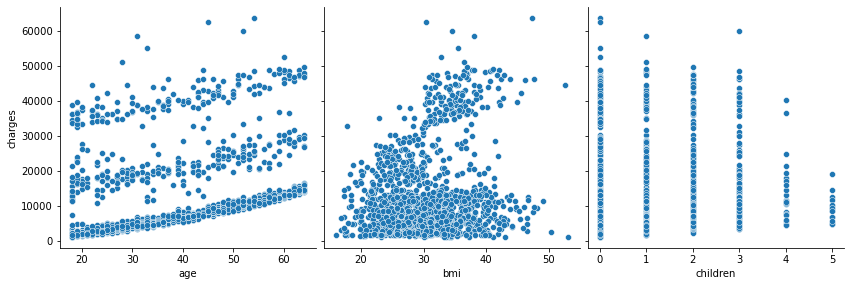

In [4]:
import matplotlib.pyplot as plt 
import seaborn as sns
# operasi visualisasi
sns.pairplot(data, x_vars=['age', 'bmi','children'], 
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

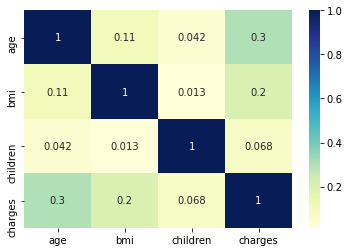

In [5]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

Dari kesimmpulan di atas, tanpa adanya variabel kategorial korelasi age dan charges adalah yang paling kuat.

# Pengolahan variabel kategorial, mapping, one-hot, VIF, cek multicollinearity.

In [6]:
# mapping kolom smoker
data['smoker'] = data['smoker'].map({'no':0, 'yes':1})
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
5,31,female,25.740,0,0,southeast,3756.62160
6,46,female,33.440,1,0,southeast,8240.58960
7,37,female,27.740,3,0,northwest,7281.50560
8,37,male,29.830,2,0,northeast,6406.41070
9,60,female,25.840,0,0,northwest,28923.13692


In [7]:
# mapping kolom sex
data['sex'] = data['sex'].map({'male':0, 'female':1})
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560
8,37,0,29.830,2,0,northeast,6406.41070
9,60,1,25.840,0,0,northwest,28923.13692


In [8]:
# mapping kolom region
data['region'] = data['region'].map({'northeast':0, 'northwest':1, 'southeast':0, 'southwest':1})
data.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520
5,31,1,25.740,0,0,0,3756.62160
6,46,1,33.440,1,0,0,8240.58960
7,37,1,27.740,3,0,1,7281.50560
8,37,0,29.830,2,0,0,6406.41070
9,60,1,25.840,0,0,1,28923.13692


In [9]:
# Slicing Data
x = data.iloc[:,0:6].values
print(x)
y = data.iloc[:,-1].values
y = y.reshape(len(y), 1)
print(y)

[[19.    1.   27.9   0.    1.    1.  ]
 [18.    0.   33.77  1.    0.    0.  ]
 [28.    0.   33.    3.    0.    0.  ]
 ...
 [18.    1.   36.85  0.    0.    0.  ]
 [21.    1.   25.8   0.    0.    1.  ]
 [61.    1.   29.07  0.    1.    1.  ]]
[[16884.924 ]
 [ 1725.5523]
 [ 4449.462 ]
 ...
 [ 1629.8335]
 [ 2007.945 ]
 [29141.3603]]


In [10]:
#encoder One HOT sex
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
tf1 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder="passthrough")
x = tf1.fit_transform(x)
x

array([[ 0.,  1., 19., ...,  0.,  1.,  1.],
       [ 1.,  0., 18., ...,  1.,  0.,  0.],
       [ 1.,  0., 28., ...,  3.,  0.,  0.],
       ...,
       [ 0.,  1., 18., ...,  0.,  0.,  0.],
       [ 0.,  1., 21., ...,  0.,  0.,  1.],
       [ 0.,  1., 61., ...,  0.,  1.,  1.]])

In [11]:
#encoder One HOT region
tf2 = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [6])], remainder="passthrough")
x = tf2.fit_transform(x)
x

array([[ 0.  ,  1.  ,  0.  , ..., 27.9 ,  0.  ,  1.  ],
       [ 1.  ,  0.  ,  1.  , ..., 33.77,  1.  ,  0.  ],
       [ 1.  ,  0.  ,  1.  , ..., 33.  ,  3.  ,  0.  ],
       ...,
       [ 1.  ,  0.  ,  0.  , ..., 36.85,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  , ..., 25.8 ,  0.  ,  0.  ],
       [ 0.  ,  1.  ,  0.  , ..., 29.07,  0.  ,  1.  ]])

In [12]:
#VIP
from statsmodels.stats.outliers_influence import variance_inflation_factor
coba1 = data[['age','sex','bmi','children','smoker','region']]
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = coba1.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(coba1.values, i) 
                        for i in range(len(coba1.columns))]
print(vif_data)

    feature       VIF
0       age  7.760250
1       sex  1.914850
2       bmi  8.714531
3  children  1.807854
4    smoker  1.252090
5    region  1.853952


- 1 - variabel indenpenden tidak memiliki korelasi dengan variabel independen yang lain
- 1 < VIF < 5 - variabel independen sedikit memiliki korelasi dengan variabel independen yang lain
- VIF > 5 - variabel independen memiliki korelasi yang kuat dengan variabel independen lainnya
- VIF > 10 - variabel independen miliki korelasi yang sangat kuat dengan variabel independen dan perlu diperhatikan lebih lanjut

### KETERANGAN
VIP pada age, bmi, smoker, region memiliki orelasi dengan variabel independen yang lain.

c:\Users\Layla\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


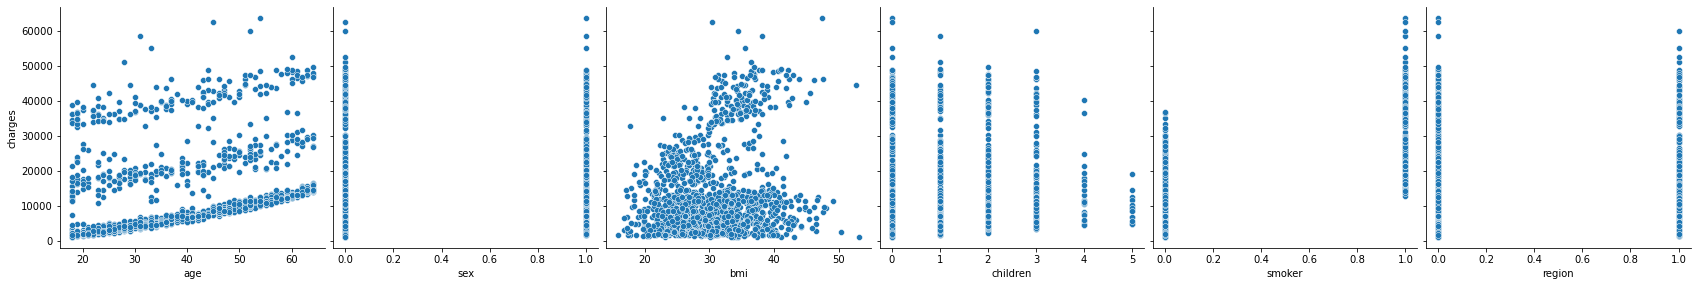

In [13]:
sns.pairplot(data, x_vars=['age','sex','bmi','children','smoker','region'], 
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

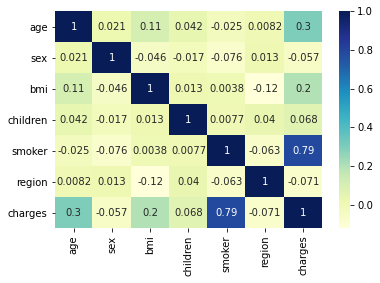

In [14]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Mencari R2

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=50)
mlr = LinearRegression()
mlr.fit(x_train, y_train)
y_pred = mlr.predict(x_test)
compare = np.concatenate((y_test, y_pred), axis=1)
compare

array([[ 5.97683110e+03,  7.99189015e+03],
       [ 5.84691760e+03,  1.17958840e+04],
       [ 1.38311152e+04,  1.72542718e+04],
       [ 9.62592000e+03,  1.13216373e+04],
       [ 2.68094930e+03,  3.47022370e+02],
       [ 4.78967913e+04,  3.91016153e+04],
       [ 1.82234512e+04,  2.65921044e+04],
       [ 7.41947790e+03,  7.74729863e+03],
       [ 3.73262510e+03,  6.58150614e+02],
       [ 1.22228983e+04,  1.15331135e+04],
       [ 7.05002130e+03,  9.24484396e+03],
       [ 2.19786769e+04,  3.23711987e+04],
       [ 6.28223500e+03,  8.20955321e+03],
       [ 3.77018768e+04,  3.12113546e+04],
       [ 7.04672220e+03,  7.54221289e+03],
       [ 1.20323260e+04,  9.45455322e+03],
       [ 1.31126048e+04,  1.15620400e+04],
       [ 4.23989265e+03,  4.75315107e+03],
       [ 1.23338280e+04,  1.23393583e+04],
       [ 3.41032400e+03,  8.84082625e+03],
       [ 1.72778500e+03, -1.36261846e+03],
       [ 4.46411974e+04,  3.69588224e+04],
       [ 1.71284261e+04,  6.78032245e+03],
       [ 6.

In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'Hasil Evaluasi R2 = {r2}')

Hasil Evaluasi R2 = 0.8022236035165793


# smoker

In [17]:
# Slicing Data
xs = data.iloc[:,4].values
xs = xs.reshape(len(xs), 1)
print(xs)
ys = data.iloc[:,-1].values
ys = ys.reshape(len(ys), 1)
print(ys)

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]
[[16884.924 ]
 [ 1725.5523]
 [ 4449.462 ]
 ...
 [ 1629.8335]
 [ 2007.945 ]
 [29141.3603]]


In [18]:
xs_train, xs_test, ys_train, ys_test = train_test_split(xs,ys, test_size=0.1, random_state=50)
mlrs = LinearRegression()
mlrs.fit(xs_train, ys_train)
ys_pred = mlrs.predict(xs_test)
compares = np.concatenate((ys_test, ys_pred), axis=1)
compares

array([[ 5976.8311    ,  8447.40324583],
       [ 5846.9176    ,  8447.40324583],
       [13831.1152    ,  8447.40324583],
       [ 9625.92      ,  8447.40324583],
       [ 2680.9493    ,  8447.40324583],
       [47896.79135   , 31831.45633731],
       [18223.4512    , 31831.45633731],
       [ 7419.4779    ,  8447.40324583],
       [ 3732.6251    ,  8447.40324583],
       [12222.8983    ,  8447.40324583],
       [ 7050.0213    ,  8447.40324583],
       [21978.6769    , 31831.45633731],
       [ 6282.235     ,  8447.40324583],
       [37701.8768    , 31831.45633731],
       [ 7046.7222    ,  8447.40324583],
       [12032.326     ,  8447.40324583],
       [13112.6048    ,  8447.40324583],
       [ 4239.89265   ,  8447.40324583],
       [12333.828     ,  8447.40324583],
       [ 3410.324     ,  8447.40324583],
       [ 1727.785     ,  8447.40324583],
       [44641.1974    , 31831.45633731],
       [17128.42608   ,  8447.40324583],
       [ 6112.35295   ,  8447.40324583],
       [ 4529.47

In [19]:
r2s = r2_score(ys_test, ys_pred)
print(f'Hasil Evaluasi R2 untuk Smoker = {r2s}')

Hasil Evaluasi R2 untuk Smoker = 0.6385650545269081


# children

In [20]:
# Slicing Data
xc = data.iloc[:,3].values
xc = xc.reshape(len(xc), 1)
print(xc)
yc = data.iloc[:,-1].values
yc = yc.reshape(len(yc), 1)
print(yc)

[[0]
 [1]
 [3]
 ...
 [0]
 [0]
 [0]]
[[16884.924 ]
 [ 1725.5523]
 [ 4449.462 ]
 ...
 [ 1629.8335]
 [ 2007.945 ]
 [29141.3603]]


In [21]:
xc_train, xc_test, yc_train, yc_test = train_test_split(xc,yc, test_size=0.1, random_state=50)
mlrs = LinearRegression()
mlrs.fit(xc_train, yc_train)
yc_pred = mlrs.predict(xc_test)
comparec = np.concatenate((yc_test, yc_pred), axis=1)
comparec

array([[ 5976.8311    , 13226.3539358 ],
       [ 5846.9176    , 13942.73507179],
       [13831.1152    , 12509.97279981],
       [ 9625.92      , 12509.97279981],
       [ 2680.9493    , 12509.97279981],
       [47896.79135   , 13226.3539358 ],
       [18223.4512    , 14659.11620778],
       [ 7419.4779    , 12509.97279981],
       [ 3732.6251    , 12509.97279981],
       [12222.8983    , 12509.97279981],
       [ 7050.0213    , 12509.97279981],
       [21978.6769    , 13226.3539358 ],
       [ 6282.235     , 13226.3539358 ],
       [37701.8768    , 13226.3539358 ],
       [ 7046.7222    , 13226.3539358 ],
       [12032.326     , 13226.3539358 ],
       [13112.6048    , 13226.3539358 ],
       [ 4239.89265   , 13226.3539358 ],
       [12333.828     , 13226.3539358 ],
       [ 3410.324     , 13226.3539358 ],
       [ 1727.785     , 12509.97279981],
       [44641.1974    , 13942.73507179],
       [17128.42608   , 15375.49734377],
       [ 6112.35295   , 13226.3539358 ],
       [ 4529.47

In [23]:
r2c = r2_score(yc_test, yc_pred)
print(f'Hasil Evaluasi R2 untuk Children = {r2c}')

Hasil Evaluasi R2 untuk Children = 0.001080467302037591


# KESIMPULAN

Kondisi multicollinearity untuk semua variabel independen :

dibawah ini adalah hasil VIF, Variance Inflation Factor (VIF) digunakan untuk mengukur tingkat keparahan multikolinearitas dalam analisis regresi.

 age = 7.760250

 sex = 1.914850

 bmi = 8.714531

 children = 1.807854

 smoker = 1.252090

 region = 1.853952

jadi, yang memiliki multicollinearity adalah age dan bmi.


Evaluasi Model ***R-squared ($R^2$)*** :

Model regresi memiliki nilai ***R-squared ($R^2$)*** 80%.
Jadi model regresi termasuk baik.


Variabel independen untuk menghasilkan model regresi yang baik pada kasus _medical insurance costs_ :

variable smoker, children, region, serta sex. variabel tersebut memiliki sedikit korelasi dengan variabel independen yang lain.


